In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\acer.DESKTOP-1VQGBE7\OneDrive\Desktop\Pandas datasets\Road.csv")
df

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [7]:
df.drop_duplicates(inplace = True)

In [9]:
df['road_signs_present'] = df['road_signs_present'].astype(str)

In [15]:
df.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [19]:
df['risk_level'] = pd.cut(df['accident_risk'],
                         bins = [0,0.3,0.6,1],
                         labels = ['Low','Medium','High'])

In [21]:
df

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,risk_level
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13,Low
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35,Medium
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30,Low
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21,Low
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32,Medium
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26,Low
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19,Low
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51,Medium


In [23]:
df['accidents_per_lane'] = df['num_reported_accidents']/df['num_lanes']

In [27]:
df['risk_level'].value_counts()

risk_level
Medium    266089
Low       210230
High       40827
Name: count, dtype: int64

<Axes: xlabel='road_type', ylabel='Average_accident_risk'>

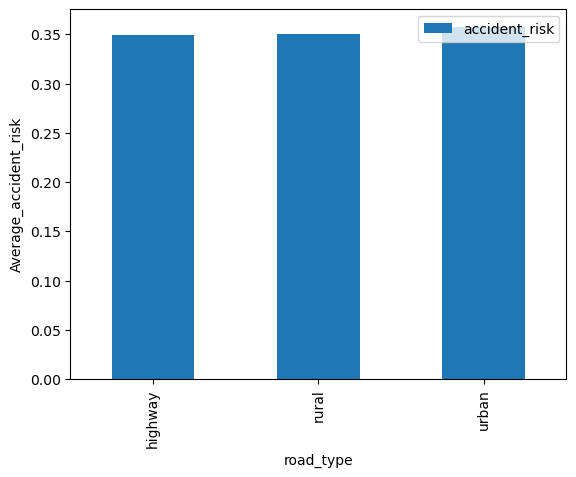

In [61]:
df.groupby('road_type').agg({'accident_risk':'mean'}).plot(kind = 'bar', ylabel = 'Average_accident_risk')

<Axes: title={'center': 'accidents_per_weather'}, ylabel='num_reported_accidents'>

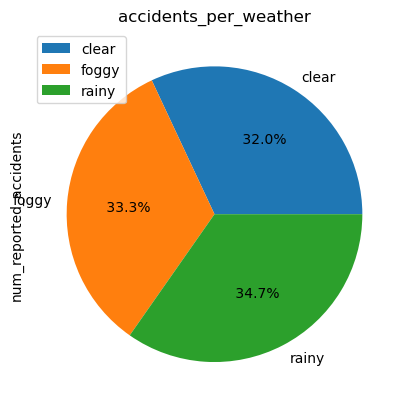

In [57]:
df.groupby('weather').agg({'num_reported_accidents':'mean'}).plot(kind = 'pie',y = 'num_reported_accidents',autopct = '% 1.1f%%',title = 'accidents_per_weather')

In [63]:
df.corr(numeric_only = True)

,id,num_lanes,curvature,speed_limit,public_road,holiday,school_season,num_reported_accidents,accident_risk,accidents_per_lane
id,1.000000,-0.000434,0.000938,-0.000678,0.000554,-0.001582,-0.001567,0.000104,0.000969,0.001320
num_lanes,-0.000434,1.000000,-0.020245,0.001194,-0.002041,0.002544,-0.001081,0.017662,-0.006003,-0.496618
curvature,0.000938,-0.020245,1.000000,0.008399,0.048220,0.063931,-0.004502,0.145034,0.543946,0.110687
speed_limit,-0.000678,0.001194,0.008399,1.000000,0.011497,0.010992,0.004392,0.031373,0.430898,0.022032
public_road,0.000554,-0.002041,0.048220,0.011497,1.000000,-0.007920,0.004117,-0.007026,0.031032,-0.004371
holiday,-0.001582,0.002544,0.063931,0.010992,-0.007920,1.000000,-0.001514,-0.015053,0.051129,-0.011453
school_season,-0.001567,-0.001081,-0.004502,0.004392,0.004117,-0.001514,1.000000,0.003962,-0.000977,0.003102
num_reported_accidents,0.000104,0.017662,0.145034,0.031373,-0.007026,-0.015053,0.003962,1.000000,0.213891,0.728363
accident_risk,0.000969,-0.006003,0.543946,0.430898,0.031032,0.051129,-0.000977,0.213891,1.000000,0.153525
accidents_per_lane,0.001320,-0.496618,0.110687,0.022032,-0.004371,-0.011453,0.003102,0.728363,0.153525,1.000000


In [65]:
df.to_csv('cleaned_road_data', index = False)